    Assignment 6

Combine the 3 marathon datasets (Hint: df pd.concat([df2015, df2016, of_20171) ). Then do a correlation analysis on 'Official time" (l.e. time taken to complete the race) and 'pace' (i.e. average pace per minute in km) columns. Draw sacatter plot and heatmap

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [32]:
df_2015 = pd.read_csv('marathon_results_2015.csv')
df_2016 = pd.read_csv('marathon_results_2016.csv')
df_2017 = pd.read_csv('marathon_results_2017.csv')
df = pd.concat([df_2015, df_2016, df_2017], ignore_index=True)

In [40]:

# Convert columns to the Timedelta data type
df['Official Time TD'] = pd.to_timedelta(df['Official Time'])
df['Pace TD'] = pd.to_timedelta(df['Pace'])

# Convert the Timedelta columns to total seconds (float)
df['Official Time Sec'] = df['Official Time TD'].dt.total_seconds()
df['Pace Sec'] = df['Pace TD'].dt.total_seconds()
# Check the data types to confirm the conversion

# Calculate correlation and covariance on the new numeric columns
df_corr = df[['Official Time Sec', 'Pace Sec']].corr()
df_cov = df[['Official Time Sec', 'Pace Sec']].cov()

print("\nCorrelation Matrix (Official Time vs. Pace):")
print(df_corr)

print("\nCovariance Matrix (Official Time vs. Pace):")
print(df_cov)


Correlation Matrix (Official Time vs. Pace):
                   Official Time Sec  Pace Sec
Official Time Sec           1.000000  0.999667
Pace Sec                    0.999667  1.000000

Covariance Matrix (Official Time vs. Pace):
                   Official Time Sec       Pace Sec
Official Time Sec       6.211420e+06  236912.069027
Pace Sec                2.369121e+05    9042.172818


<Axes: xlabel='Official Time Sec', ylabel='Pace Sec'>

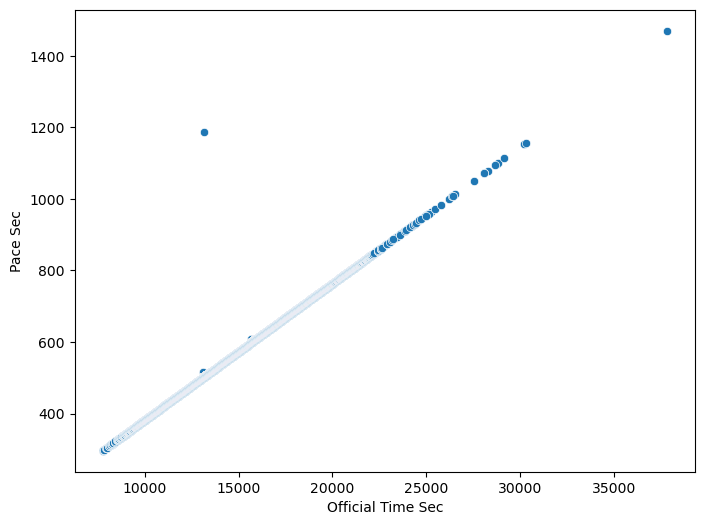

In [ ]:
#Draw scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Official Time Sec', y='Pace Sec', data=df)

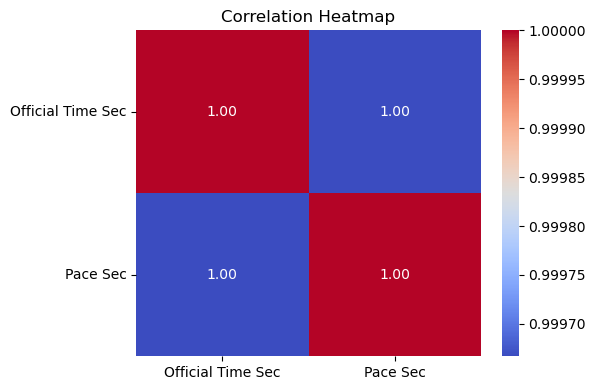

In [45]:
#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_corr, annot=True,fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

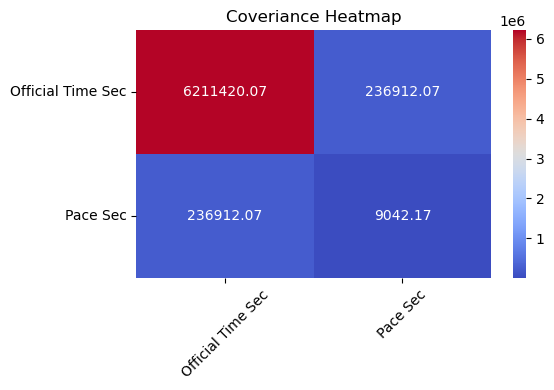

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cov, annot=True,fmt='.2f', cmap='coolwarm')
plt.title('Coveriance Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()